### A quick demonstration of computing analytic B-mode spectrum from convolution of E and phi

In [1]:
import numpy as np
import basic
from matplotlib.pyplot import *

In [2]:
# define parameters
Tcmb = 2.726e6    # CMB temperature
lmax = 3000       # maximum multipole of output cl
l = np.linspace(0,lmax,lmax+1)
dlmin = 2
dlmax = 2048

In [3]:
# load unlensed and lensed Cls
ucl  = basic.aps.read_cambcls('../data/unlensedcls.dat',2,lmax,5)/Tcmb**2
lcl  = basic.aps.read_cambcls('../data/lensedcls.dat',2,lmax,4,bb=True)/Tcmb**2

Compute delensed BB

In [4]:
# E-mode power spectrum
EE = ucl[1,:]
# Lensing potential power spectrum
pp = ucl[3,:]
# Wiener filter (no noise)
WE = np.ones(dlmax+1)
Wp = np.ones(dlmax+1)

In [5]:
bb = basic.delens.lintemplate(lmax,dlmin,dlmax,EE[:dlmax+1],pp[:dlmax+1],WE,Wp)

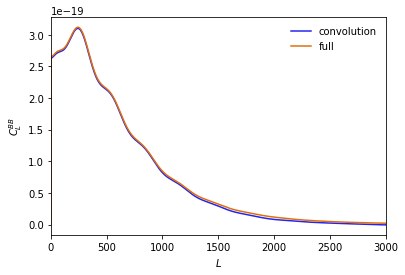

In [6]:
xlim(2,lmax)
xlabel('$L$')
ylabel('$C_L^{BB}$')
plot(l,bb,label='convolution')
plot(l,lcl[2,:],label='full')
legend()

In [7]:
# save to a file if necessary
#np.savetxt('test.dat',np.array((l,bb).T)